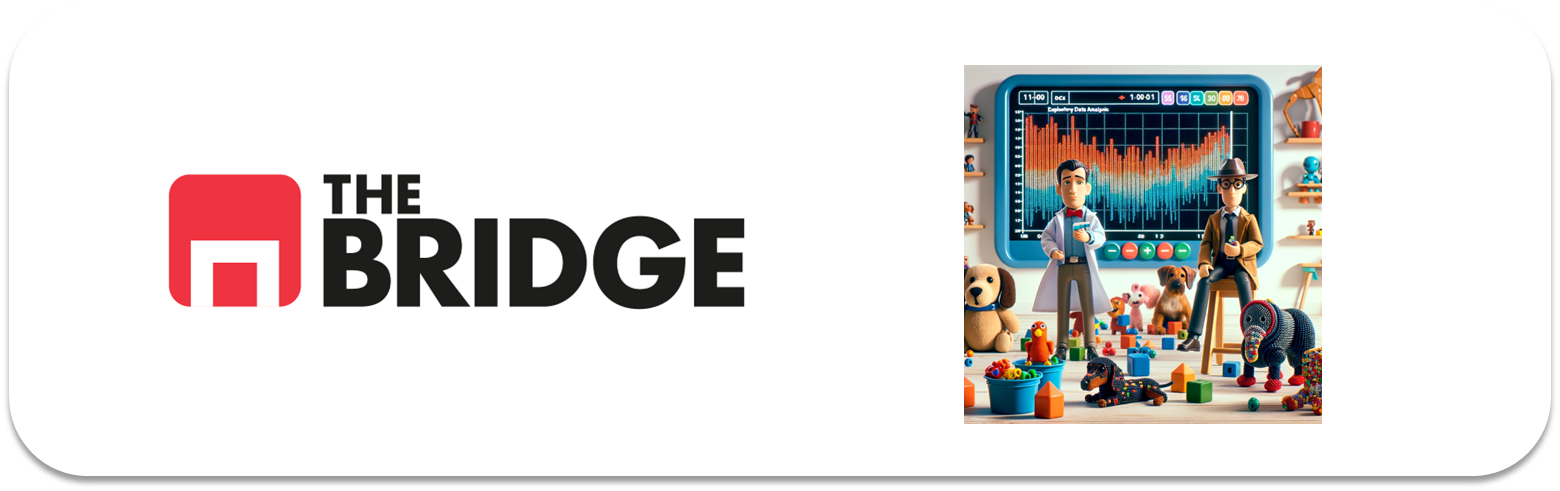

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as b

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic_copy = df_titanic.copy()
df_titanic.drop(columns=["deck", "survived", "pclass","embarked"], inplace=True)
df_titanic.head(3)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"] = df_titanic.parch + df_titanic.sibsp

In [5]:
df_titanic.drop(columns=["parch","sibsp"], inplace=True)
df_titanic.head(3)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
# Numero de NaN en "embark_town"

df_titanic.embark_town.value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [7]:
# Sustitucion de NaN en "embark_town" por la moda de "embark_town"

filtro = df_titanic.embark_town.isna()

df_titanic.loc[filtro,"embark_town"] = df_titanic.embark_town.mode().values[0]

In [8]:
# Confirmacion de que ya no hay NaN

df_titanic.embark_town.value_counts(dropna=False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [9]:
# Cálculo edad media segun categorias de "who"

serie_mean_age = df_titanic.groupby(["who"])["age"].mean()
serie_mean_age

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [10]:
# Sustitución de valores NaNs por la media de cada categoria de "who"

for i in range(0, len(serie_mean_age.index)):
    filtro_NaNs = df_titanic["age"].isna()
    filtro_who = df_titanic["who"] == serie_mean_age.index[i]
    df_titanic.loc[filtro_NaNs & filtro_who, "age"] = serie_mean_age.values[i]
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

# 1.6.1.

1.6.1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

## Terminos absolutos

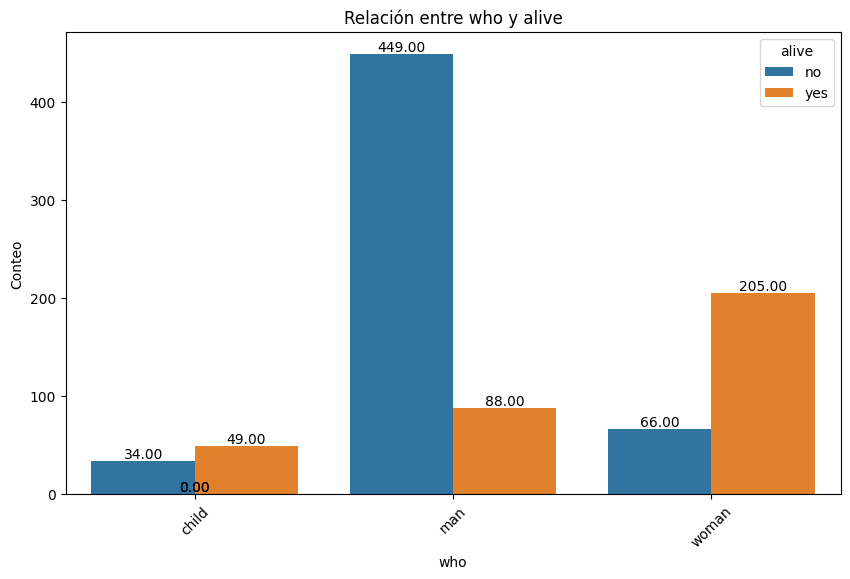

In [11]:
# En terminos absolutos sobrevivieron muchas mas mujeres que hombres y niños.

b.plot_categorical_relationship_fin(df_titanic, "who","alive",show_values= True)

In [12]:
filtro_niño = df_titanic["who"] == "child"
filtro_mujer = df_titanic["who"] == "woman"
filtro_hombre = df_titanic["who"] == "man"
filtro_OK = df_titanic["alive"] == "yes"

df_titanic.shape[0]


891

## Terminos relativos 

### Niños

In [13]:
# Relativa niños --> LSe salvaron el 59.04 % de los niños que iban a bordo

round(df_titanic.loc[filtro_niño & filtro_OK, "alive"].count()/df_titanic.loc[filtro_niño, "alive"].count()*100,2)



59.04

In [14]:
# Los niños salvados solo representaron el 5,5 % del total del pasaje

ninios = round(df_titanic.loc[filtro_niño & filtro_OK, "alive"].count()/df_titanic.shape[0]*100,2)
ninios


5.5

### Mujeres

In [15]:
# Relativa nmujeres --> Se salvaron el 75.65 % de las mujeres que iban a bordo

round(df_titanic.loc[filtro_mujer & filtro_OK, "alive"].count()/df_titanic.loc[filtro_mujer, "alive"].count()*100,2)

75.65

In [16]:
# Los mujeres salvadas representaron el 23.01 % del total del pasaje

mujeres = round(df_titanic.loc[filtro_mujer & filtro_OK, "alive"].count()/df_titanic.shape[0]*100,2)
mujeres

23.01

### Hombres

In [17]:
# Relativa hombres --> Se salvaron solo el 16.39 % de los hombres que iban a bordo

round(df_titanic.loc[filtro_hombre & filtro_OK, "alive"].count()/df_titanic.loc[filtro_hombre, "alive"].count()*100,2)

16.39

In [18]:
# Los hombres salvados representaron solo el 9.83 % del total del pasaje

hombres = round(df_titanic.loc[filtro_hombre & filtro_OK, "alive"].count()/df_titanic.shape[0]*100,2)
hombres

9.88

### Districucion valores % supervivencia

In [19]:
total_OK = ninios +  mujeres + hombres
relativa_ninios = round(ninios/total_OK*100,2)
relativa_mujeres = round(mujeres/total_OK*100,2)
relativa_hombres = round(hombres/total_OK*100,2)

print(f"Del total de supervivientes el {relativa_ninios} % fueron niños")
print(f"Del total de supervivientes el {relativa_mujeres} % fueron mujeres")
print(f"Del total de supervivientes el {relativa_hombres} % fueron hombres")


Del total de supervivientes el 14.33 % fueron niños
Del total de supervivientes el 59.94 % fueron mujeres
Del total de supervivientes el 25.74 % fueron hombres


## Relaciones estadisticas

In [20]:
from scipy.stats import chi2_contingency

## Sex vs. Alive

In [21]:
tabla_contingencia = pd.crosstab(df_titanic['sex'], df_titanic['alive'])

tabla_contingencia

alive,no,yes
sex,,
female,81,233
male,468,109


In [22]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


## Interpretacion:

- Al ser un P-value menor que 0,05 rechazamos la hipotesis de partida (independecia de las variables), es decir, podemos afirmar que las variables son dependientes entre si:   
sexo_femenino = Sobrevivir   
sex_masculino = No_sobrevivir

## Adulto/Menor vs. Alive --> Me hago un DF con una columna donde la categoria who pasa de 3 a 2 valores

In [23]:
filtro_sex_mujer = df_titanic["who"] == "woman"
filtro_sex_hombre = df_titanic["who"] == "man"

df_titanic["+18"] = "child"

df_titanic.loc[(filtro_sex_mujer | filtro_sex_hombre),"+18"] = "adult"

In [24]:
df_titanic["+18"].unique()

array(['adult', 'child'], dtype=object)

In [25]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,+18
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,adult
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,adult
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,adult
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,adult
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,adult
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,adult
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,adult
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3,adult
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,adult


In [26]:
tabla_contingencia = pd.crosstab(df_titanic['+18'], df_titanic['alive'])

tabla_contingencia

alive,no,yes
+18,,
adult,515,293
child,34,49


In [27]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]


## Interpretacion:

- Al ser un P-value menor que 0,05 rechazamos la hipotesis de partida (independecia de las variables), es decir, podemos afirmar que las variables son dependientes entre si:   
adult = No_Sobrevivir   
chid = Sobrevivir

- Si que es cierto que el p-value es mucho menor que en el caso anterior, entiendo que esto quiere decir que la relacion es menor, es decir, no es tan cierto como en el caso de ser mujer del analisis anterior.

# 1.6.2.

1.6.2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

Creo que en el punto anterior (1.6.1), cuando se pedia en terminos relativos, se pedia unicamente cambiar el argumento de la funcion relative_freq a True, pero yo he calculado el % de supervivencia de cada clase en el conjunto del total del pasaje y de de cada clase en el conjunto total de los supervivientes.
Para este caso solo usare el argumento retative_freq que creo que es lo que esta pidiendo el enunciado.

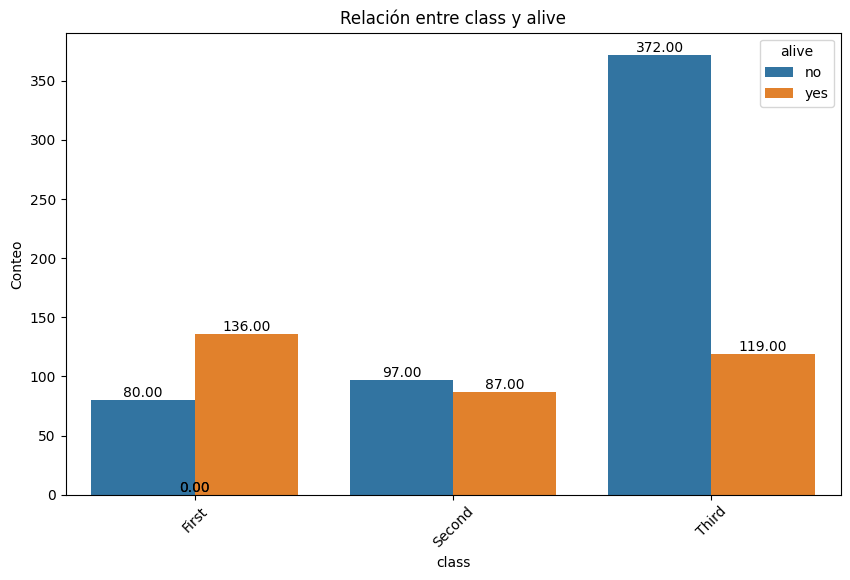

In [28]:
# Absoluto --> Sobrevirieron mas pasajeros de primera clase

b.plot_categorical_relationship_fin(df_titanic, "class","alive",show_values= True)

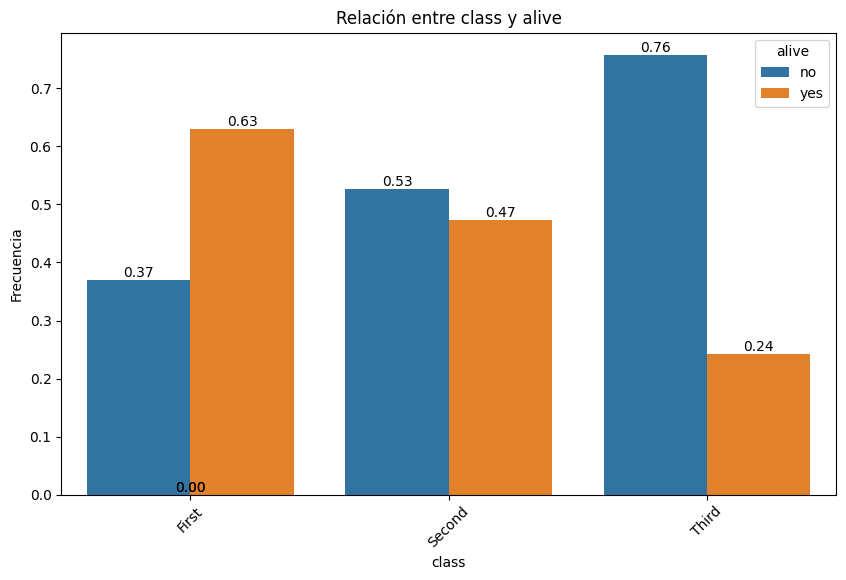

In [29]:
# Relativo --> Sobrevivieron mas pasajeros de primera clase tambien en terminos relativos

b.plot_categorical_relationship_fin(df_titanic, "class","alive",show_values= True, relative_freq=True)

In [30]:
# Relaciones estadisticas 

In [31]:
tabla_contingencia = pd.crosstab(df_titanic['class'], df_titanic['alive'])

tabla_contingencia

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [32]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


## Interpretacion:

- Al ser un P-value menor que 0,05 rechazamos la hipotesis de partida (independecia de las variables), es decir, podemos afirmar que las variables son dependientes entre si.   
La clase si que determina el grado de supervivencia.   



# 1.6.3.

1.6.3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

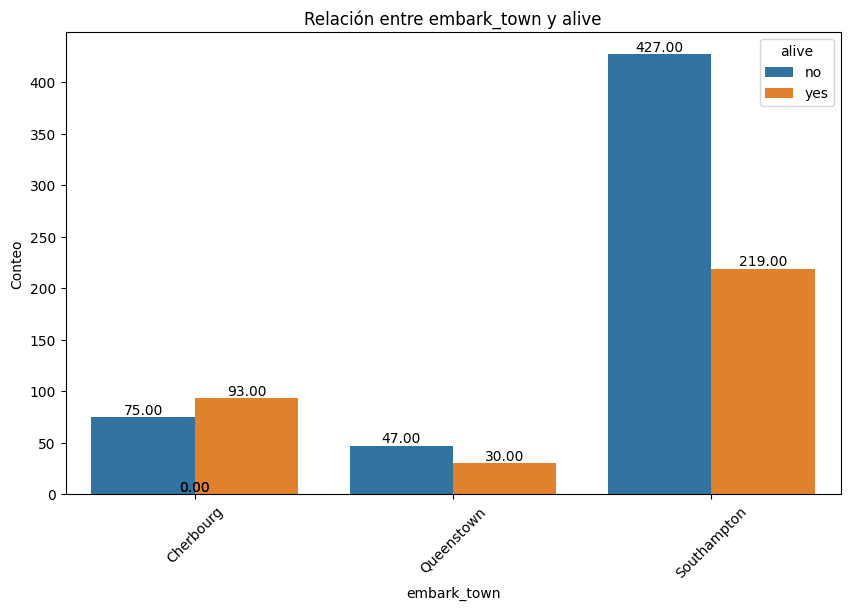

In [33]:
# Absoluto --> Sobrevivieron mas personas de Southampton

b.plot_categorical_relationship_fin(df_titanic, "embark_town","alive",show_values= True)

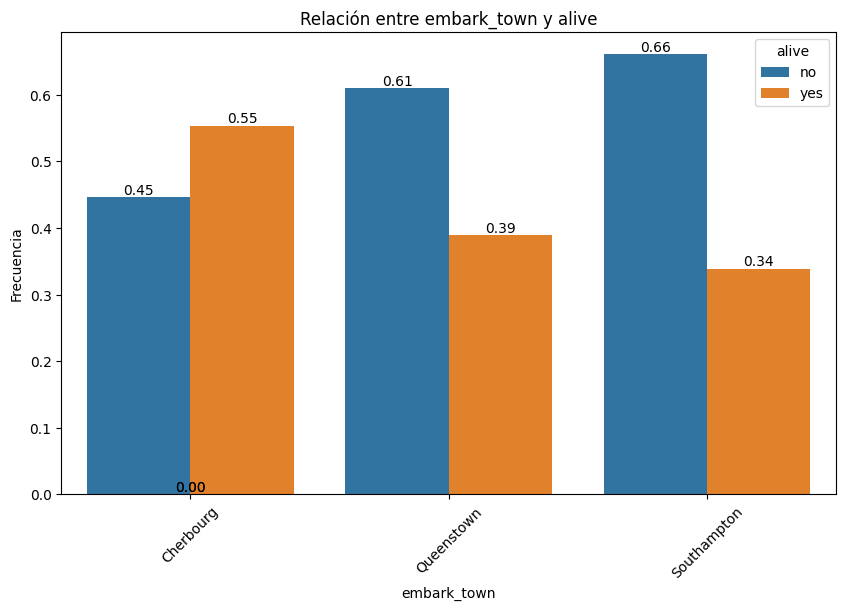

In [34]:
# Relativo --> Sobrevivieron mas personas de Cherburg (comparado solo con las que embarcaron alli)

b.plot_categorical_relationship_fin(df_titanic, "embark_town","alive",show_values= True, relative_freq=True)

In [35]:
# Relaciones estadisticas

tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])

tabla_contingencia

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [36]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


## Interpretacion:

- Al ser un P-value menor que 0,05 rechazamos la hipotesis de partida (independecia de las variables), es decir, podemos afirmar que las variables son dependientes entre si.   
El lugar de supervivencia si que determina el grado de supervivencia. 


## 1.6.4

1.6.4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

(2,)


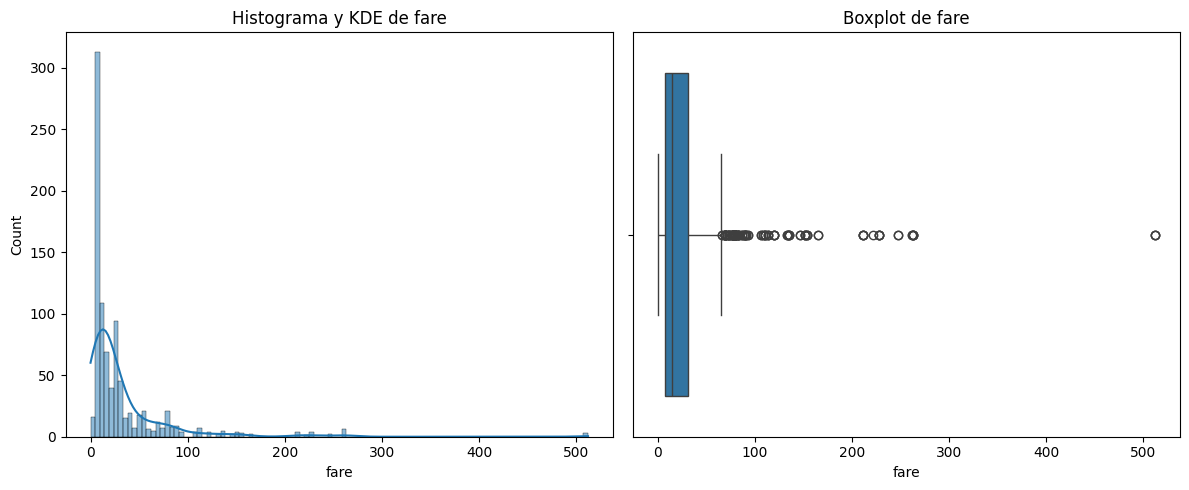

In [37]:
b.plot_combined_graphs(df_titanic,["fare"])

Me da un fallo sobre el tamaño de la muestra usando U-de Mann-Whitney.
Voy a ejecutar el metodo ANOVA mas abajo

In [38]:
from scipy.stats import mannwhitneyu

In [39]:
# U-de Mann-Whitney

grupo_a = df_titanic.loc[df_titanic.alive == "Yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "No"]["fare"]

In [40]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: nan
Valor p: nan


C:\Users\Luis\AppData\Local\Temp\ipykernel_28916\1671267039.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)


In [41]:
# ANOVA

from scipy import stats

grupos = df_titanic['alive'].unique()  
precio_pasaje = [df_titanic[df_titanic['alive'] == grupo]['fare'] for grupo in grupos] 
precio_pasaje

[0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 884     7.0500
 885    29.1250
 886    13.0000
 888    23.4500
 890     7.7500
 Name: fare, Length: 549, dtype: float64,
 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 875     7.2250
 879    83.1583
 880    26.0000
 887    30.0000
 889    30.0000
 Name: fare, Length: 342, dtype: float64]

In [42]:
f_val, p_val = stats.f_oneway(*precio_pasaje) 
                                                    
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 63.03076422804448
Valor p: 6.120189341921873e-15


## Interpretacion:

- Al ser un P-value menor que 0,05 rechazamos la hipotesis de partida (independecia de las variables), es decir, podemos afirmar que las variables son dependientes entre si.   
El coste del billete si que tiene relacion con la supervivencia.

## 1.6.5


1.6.5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

- He intentado mirar en internet si es que hubo algun sorteo en la epoca en la que se regalarna billetes para el Titanic, pero no he encontrado nada por ahoa.
- Luego he pensado que podria ser parte de la triuplacion, pero no tiene sentido, no estarian en esta lista supongo.
- Seguire pensando.   

- Luego en referencia a la pesona que mas dinero se dejo, no se si la pregunta tiene otra intepretacion en relacion a que no solo ella se gasto dinero en su billete, si no que se "gastara" mas dinero porque iba con la familia.
- Es complicado saberlo pues aunque si que te dice el numero de miembros que era la unidad familiar, no se puede saber quien iba con quien con certeza, pues no hay apellidos que los vinculen.
- Hubieron dos hombres que compraron el billete mas caro y luego una mujer. Son de edades similares y salieron del mismo origen, por lo que podrian ser dos de ellos pareja. Si bien es cierto que uno de los hombres si que pone que tenia familia (1) y que no estaba "solo", pero los otros dos (hombres y mujer) si que ponia que iban solos...quiza eran amantes y por eso no figuraban como "matrimonio" quien sabe...

In [43]:
df_titanic.loc[df_titanic["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,+18
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,adult
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,adult
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0,adult
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,adult
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0,adult
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,adult
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,adult
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,adult
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,adult
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0,adult


In [44]:
df_titanic["fare"].nlargest()

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: fare, dtype: float64

In [45]:
df_titanic.iloc[258]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
+18                   adult
Name: 258, dtype: object

In [46]:
df_titanic.iloc[679]

sex                    male
age                    36.0
fare               512.3292
class                 First
who                     man
adult_male             True
embark_town       Cherbourg
alive                   yes
alone                 False
family_members            1
+18                   adult
Name: 679, dtype: object

In [47]:
df_titanic.iloc[737]

sex                    male
age                    35.0
fare               512.3292
class                 First
who                     man
adult_male             True
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
+18                   adult
Name: 737, dtype: object

## 1.6.6

1.6.6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [48]:
# Cherbourg: se ve como los billetes mas baratos tenian menos probabilidad de sobrevivir.
# Queenstown: cen este origen casi tofos los viajeros erand e tercera. No hay diferencia por el simple hecho que en tercera todos los billetes costaban igual.
# Southampton: es el mismo caso que Cherbourg.


df_titanic.groupby(["embark_town", "alive"])["fare"].median()

embark_town  alive
Cherbourg    no       14.45830
             yes      56.92920
Queenstown   no        7.75000
             yes       7.80835
Southampton  no       10.50000
             yes      26.00000
Name: fare, dtype: float64

In [49]:
df_titanic.groupby(["embark_town", "alive"])["fare"].mean()

embark_town  alive
Cherbourg    no       35.443335
             yes      79.720926
Queenstown   no       13.335904
             yes      13.182227
Southampton  no       20.743987
             yes      39.916514
Name: fare, dtype: float64

# 1.6.7

1.6.7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [50]:
# Divido el DF en dos, uno con supervivientes y otro con los NO supervivientes. Ahora analizo las variables class y age, sacando la moda de age para saber que edad fue la que mas sobrevivio de cada clase.
# He modifica la funcion "plot_categorical_numerical_relationship" para que tambien pueda devolver la moda (.agg(pd.Series.mode).

filtro_alive = df_titanic["alive"] == "yes"
filtro_not_alive = df_titanic["alive"] == "no"

df_alive = df_titanic[filtro_alive]
df_not_alive = df_titanic[filtro_not_alive]

## Supervivientes

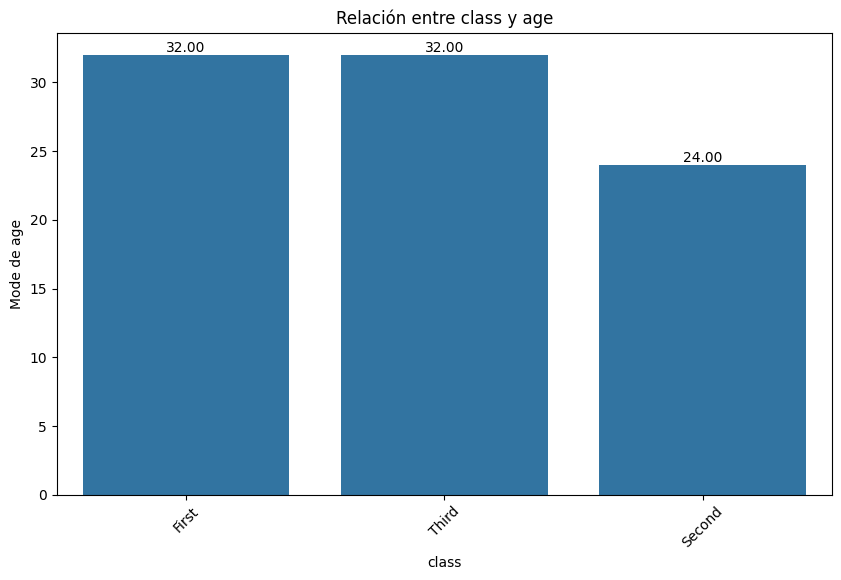

In [51]:
# Estos valores me parecian raros inicialmente, por coincidir la moda de primera y segunda clase, asi que he revisado toda la serie de modas de cada clase (ver abajo)

b.plot_categorical_numerical_relationship(df_alive,"class","age", measure = "mode", show_values=True)

In [52]:
df_alive.loc[df_alive["class"] == "First", "age"].value_counts().head(2)

age
32.0    11
35.0     9
Name: count, dtype: int64

In [53]:
df_alive.loc[df_alive["class"] == "Second", "age"].value_counts().head(2)

age
24.0    6
28.0    5
Name: count, dtype: int64

In [54]:
df_alive.loc[df_alive["class"] == "Third", "age"].value_counts().head(2)

age
32.000000    30
33.173123     9
Name: count, dtype: int64

## NO Supervivientes

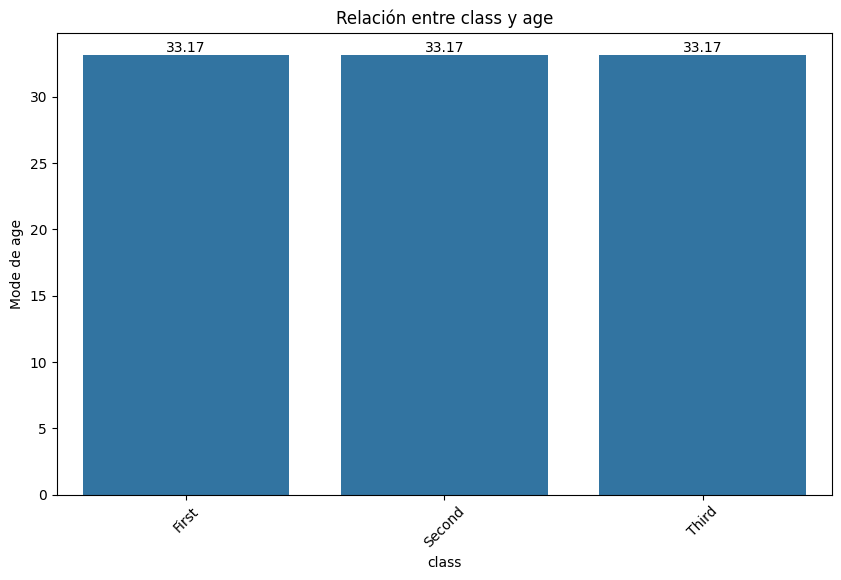

In [55]:
# Aqui pasa algo raro. Los valores 33.17 son la media de las edades que antes se han sustituido por los NaNs, creaando un sesgo aparente,
# al menos en los no supervivientes ya que entiendo que se desconociera la edad de muchos de ellos (muchos eran de tercera).

b.plot_categorical_numerical_relationship(df_not_alive,"class","age", measure = "mode", show_values=True)

In [56]:
# Queda claro que hay un sesgo por la correcion de los NaNs.
# El segunda dato seria mas fiel a la respuesta de cual el grupo de edad, en primera, que mas fallecio --> 47 años

df_not_alive.loc[df_not_alive["class"] == "First", "age"].value_counts().head(2)


age
33.173123    16
47.000000     4
Name: count, dtype: int64

In [57]:
# Queda claro que hay un sesgo por la correcion de los NaNs.
# El segunda dato seria mas fiel a la respuesta de cual el grupo de edad, en segunda, que mas fallecio --> 23 años

df_not_alive.loc[df_not_alive["class"] == "Second", "age"].value_counts().head(2)

age
33.173123    7
23.000000    6
Name: count, dtype: int64

In [58]:
# Queda claro que hay un sesgo por la correcion de los NaNs.
# El segunda dato seria mas fiel a la respuesta de cual el grupo de edad, en stercera, que mas fallecio --> 24 años

df_not_alive.loc[df_not_alive["class"] == "Third", "age"].value_counts().head(2)

age
33.173123    85
32.000000    24
Name: count, dtype: int64

## Multivariante

In [59]:
# Se intenta hacer un amalisis multivariante, pero al ser una de ellas una categorica numerica con muchas clases, se complica.
# Habria que reducir las categorias de edad, por ejemplo por decadas o lustros.
# Tambien hay que decir, que viendo los datos de las graficas de arriba, la sustitucion de los valores NaN de la columna "edad" han generado sesgos, 
# pues haciendo la moda se ve una diferencia muy grande entre el valor moda y el resto.

columnas = ["alive","age","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]


Respuesta no:


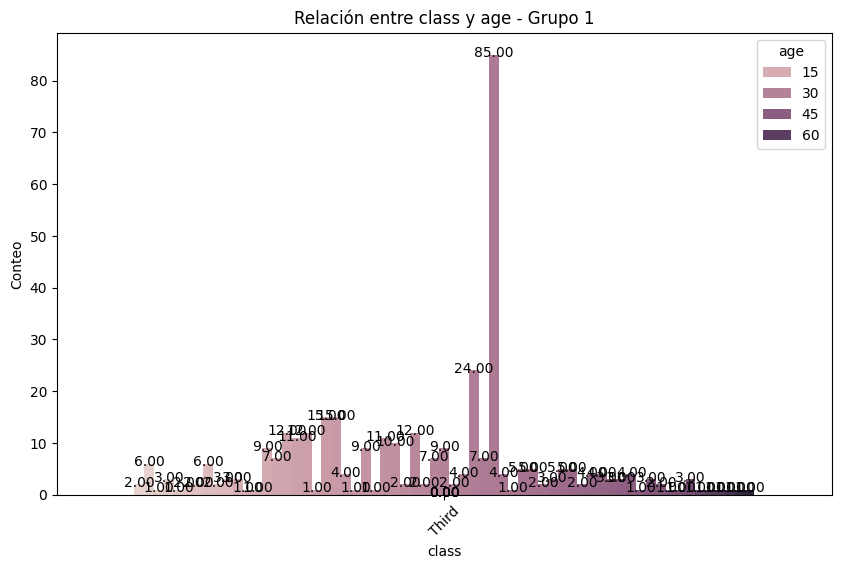

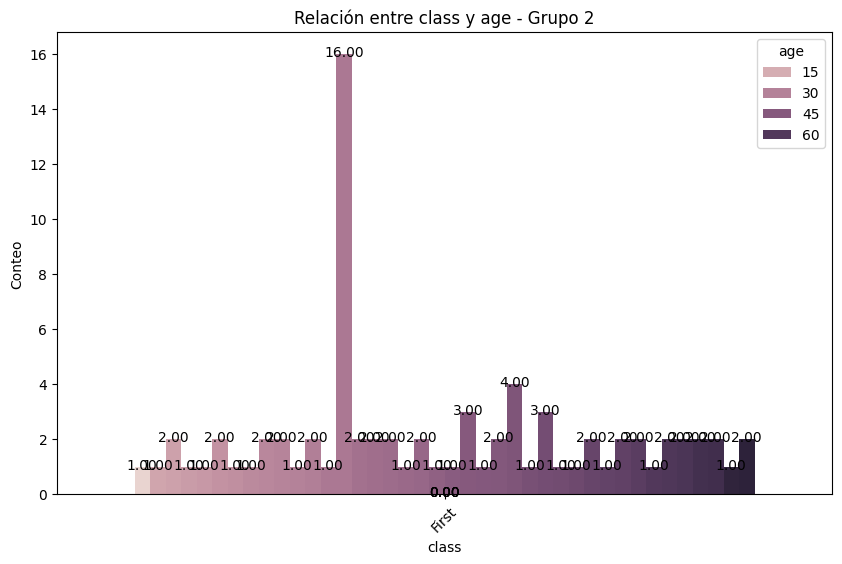

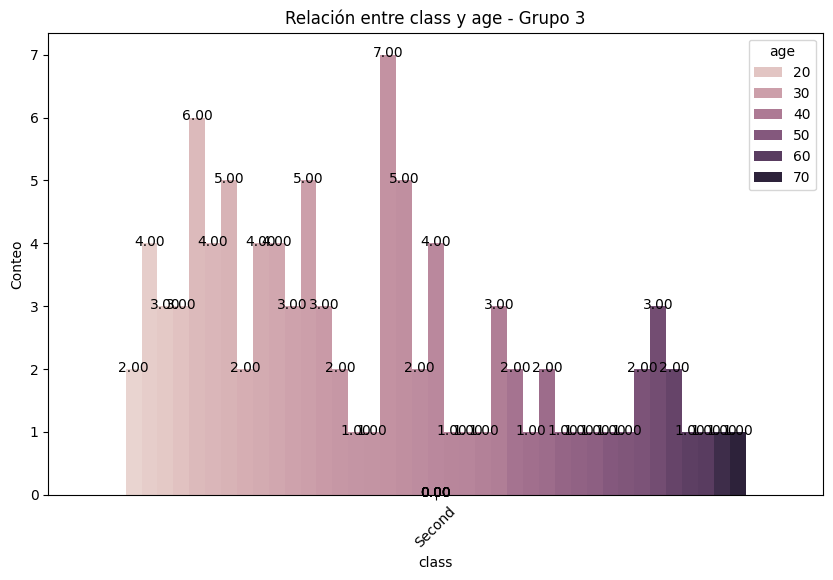

Respuesta yes:


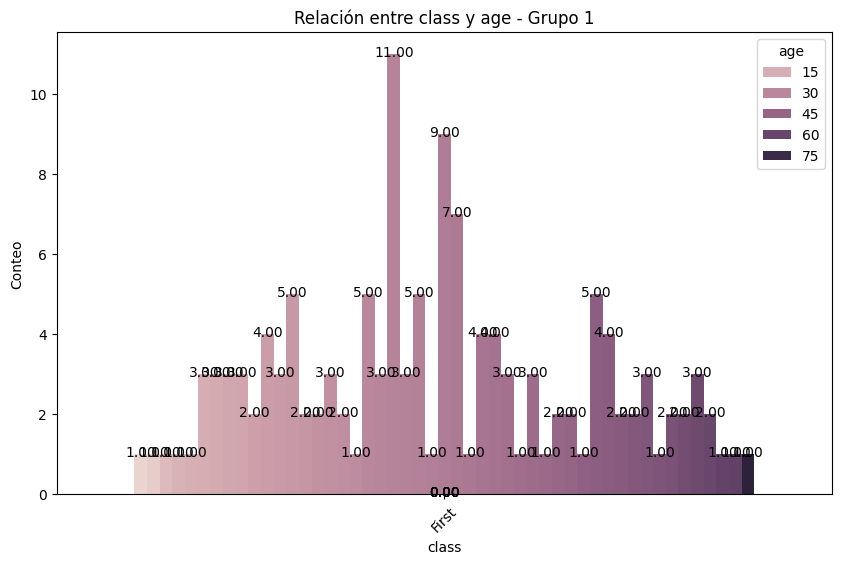

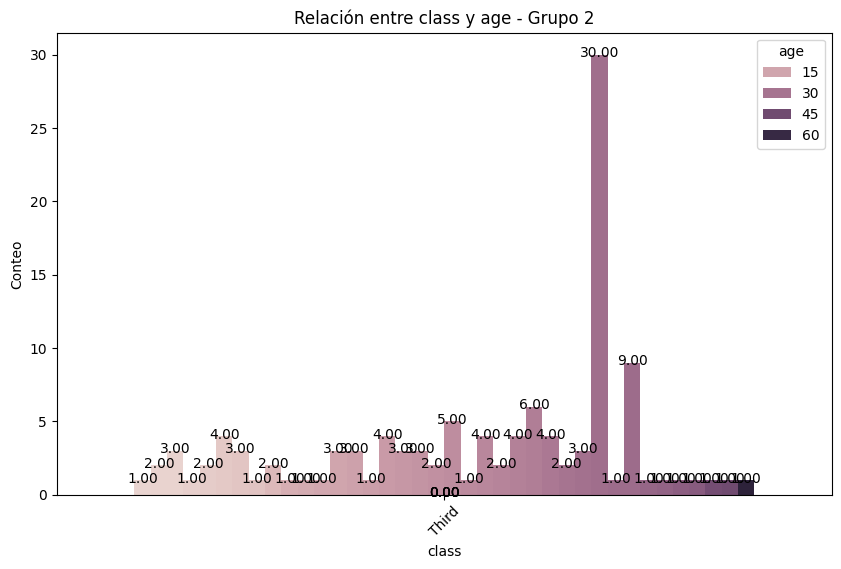

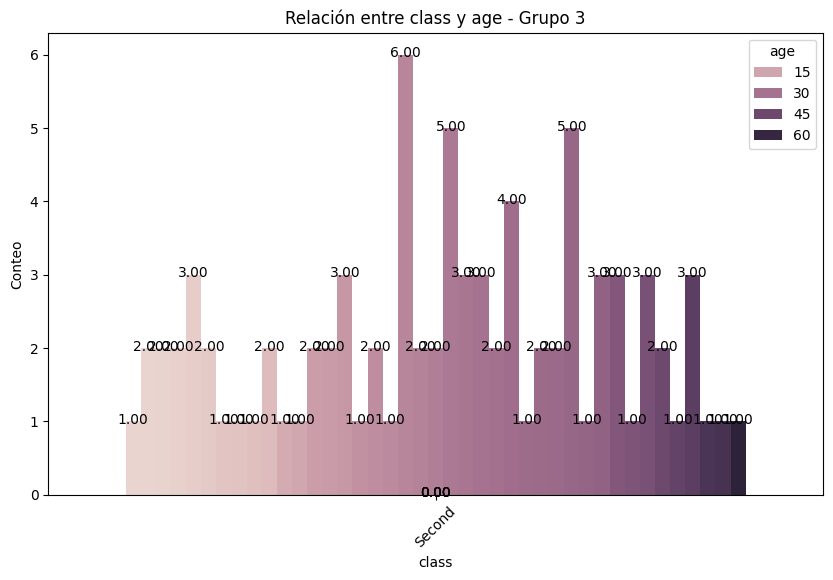

In [60]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    b.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= False, show_values= True,size_group=1)

## 1.6.8

1.6.8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

- No hay relacion entre la edad y el coste del billete a la hora de la supervivencia en el Titanic

In [61]:
col_directora = "alive"
col_1 = "age"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


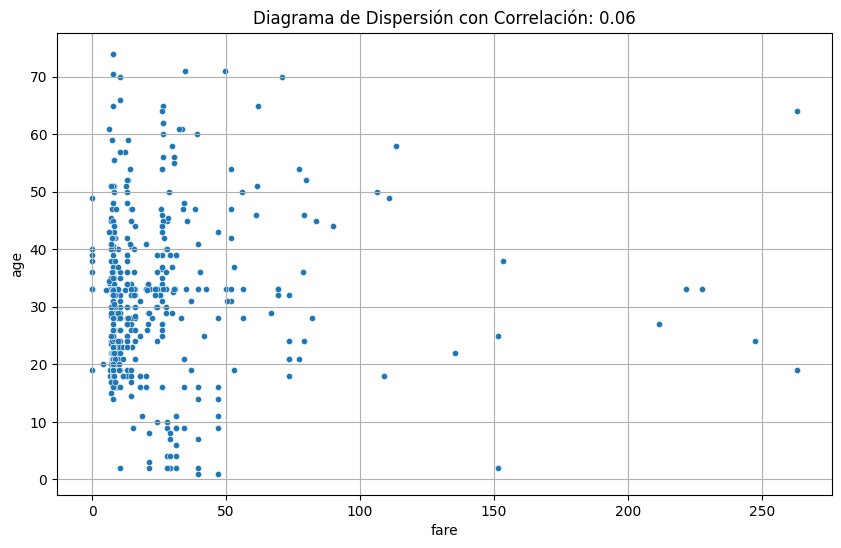

Respuesta yes:


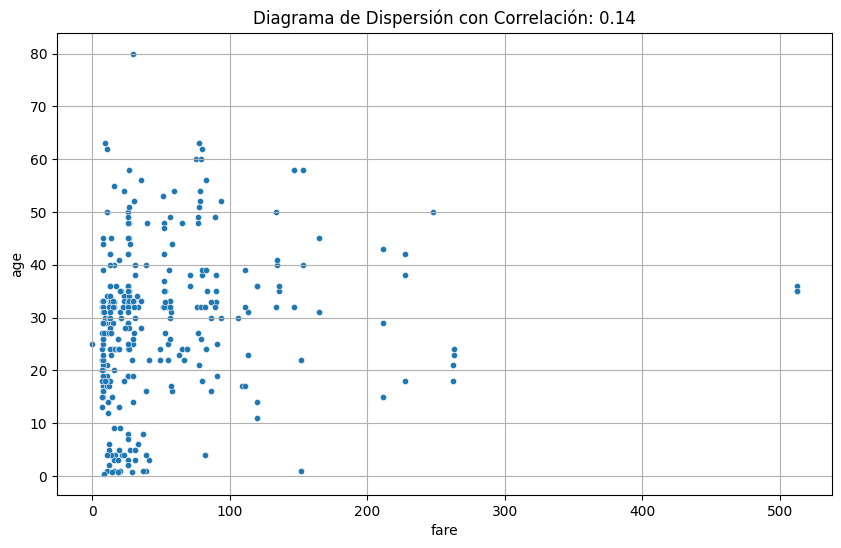

In [62]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    b.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [63]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

- Se veia que habia una linea de vuelos mucho mas eficientes en terminos de consumo/distancia y su rentabilidad

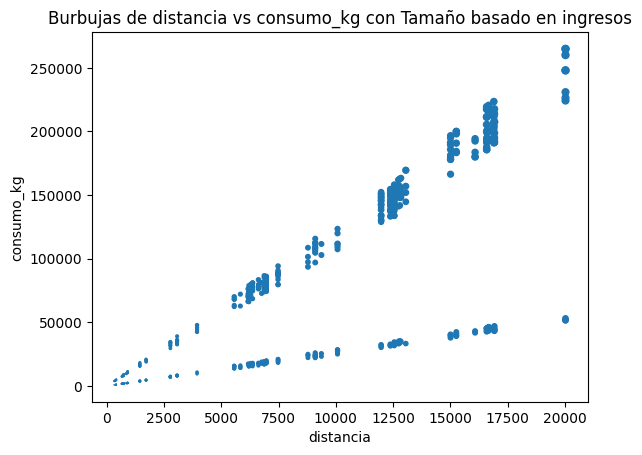

In [64]:
b.bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 50000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [65]:
def clasificador_apply(distancia):
    if distancia > 9000:
            clasificacion = "LD"
    elif distancia >= 2500:
        clasificacion = "MD"
    else:
        clasificacion = "CD"
    return clasificacion

In [66]:
df_air_jun["cat_vuelo"] = df_air_jun["distancia"].apply(clasificador_apply)

In [67]:
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LD
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,LD
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LD
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,LD
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LD


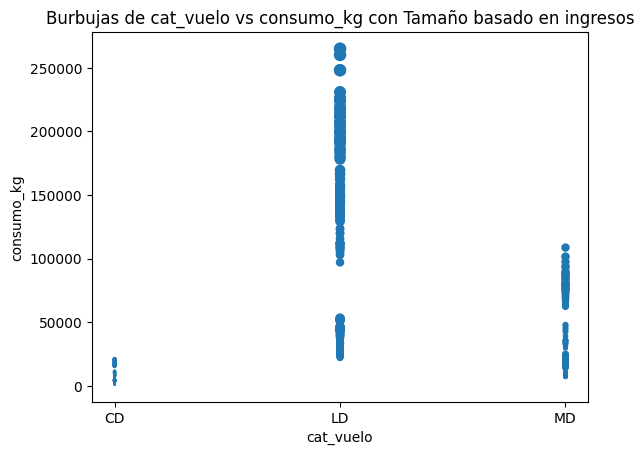

In [68]:
# De este grafico veo que hay mucho solape en cuanto a consumos y tipo de vuelo.
# Esto me hace pensar que se estan usando aviones de corta distancia en media distancia y aviones de media distancia en larga distancia.
# Entenderia un solape en los limites de los rangos, pero no en practicamente todo el rango como en el caso de la MD.

b.bubble_plot(df_air_jun,"cat_vuelo","consumo_kg","ingresos", scale = 20000)

In [69]:
# Aqui intento ver si para un mismo origen_destino se usan aviones diferentes y si, si que se usan, con consumos disparese ingresos dispares.
# Por ejemplo los vuelo Tab_RoNu, en los cuales se usan hasta los 4 aviones.

df_air_jun.groupby(["id_vuelo", "distancia", "consumo_kg"])["ingresos"].mean()

id_vuelo        distancia  consumo_kg   
Air_BaCa_10737  12798      35577.416160     432558.22
Air_BaCa_10747  12798      141883.747200    736530.54
Air_BaCi_10737  15011      37935.799200     544087.81
                           39073.873176     515892.83
Air_BaCi_10747  15011      178067.206928    928050.52
                                              ...    
Tab_RoLo_11380  10077      119984.823600    614848.04
Tab_RoNu_10737  6877       18382.221000     248170.66
Tab_RoNu_10747  6877       76241.172800     392622.72
Tab_RoNu_11320  6877       18131.238008     279534.74
Tab_RoNu_11380  6877       86652.950800     429135.08
Name: ingresos, Length: 574, dtype: float64

In [70]:
# Voy a hacerme dos DF que filtren para entender porque hay vuelos que con el mismo consumo en CD tiene ingresos tan diferentes.

# Se ve como en el DF de altos ingresos, se usan los aviones adecuados para ese recorrido, A320 y B737.
# Logicamente no debe de tener el mismo coste poner en el aire un A380 que un A320 y lo mismo con sus homologos de Boeing.

filtro_CD = df_air_jun.cat_vuelo == "CD"
filtro_consumo_lim_sup = df_air_jun.consumo_kg <= 5000
filtro_consumo_lim_inf = df_air_jun.consumo_kg >= 4000
filtro_alto_ingreso = df_air_jun.ingresos >= 50000
filtro_bajo_ingreso = df_air_jun.ingresos <= 25000

In [71]:
# DF de altos ingresos

df_air_jun.loc[filtro_CD & filtro_consumo_lim_inf & filtro_consumo_lim_sup & filtro_alto_ingreso]

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
220,MoldaviAir,Londres,Cádiz,1716,Airbus A320,False,4737.8760,144,64843.91,Mol_LoCa_11320,Jun23,CD
270,MoldaviAir,Londres,Cádiz,1716,Boeing 737,False,4545.1692,150,62236.41,Mol_LoCa_10737,Jun23,CD
406,MoldaviAir,Cádiz,Londres,1716,Boeing 737,False,4461.7716,150,63380.98,Mol_CaLo_10737,Jun23,CD
502,Airnar,Cádiz,Ginebra,1725,Airbus A320,False,4589.5350,145,65561.74,Air_CaGi_11320,Jun23,CD
584,MoldaviAir,Londres,Cádiz,1716,Airbus A320,False,4737.8760,144,70674.57,Mol_LoCa_11320,Jun23,CD


In [72]:
# DF de bajos ingresos

df_air_jun.loc[filtro_CD & filtro_consumo_lim_inf & filtro_consumo_lim_sup & filtro_bajo_ingreso]

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
160,PamPangea,Ginebra,París,411,Boeing 747,False,4775.5734,47,23372.28,Pam_GiPa_10747,Jun23,CD
190,Airnar,Ginebra,París,411,Boeing 747,False,4468.8852,47,24361.82,Air_GiPa_10747,Jun23,CD
213,Airnar,Ginebra,París,411,Boeing 747,False,4425.0726,47,24336.11,Air_GiPa_10747,Jun23,CD
305,PamPangea,Londres,París,344,Airbus A380,False,4175.4720,42,21260.35,Pam_LoPa_11380,Jun23,CD
343,MoldaviAir,Londres,París,344,Airbus A380,False,4255.0048,42,20832.30,Mol_LoPa_11380,Jun23,CD
394,PamPangea,París,Ginebra,411,Boeing 747,False,4600.3230,47,24178.48,Pam_PaGi_10747,Jun23,CD
555,MoldaviAir,París,Londres,344,Airbus A380,False,4294.7712,42,20902.39,Mol_PaLo_11380,Jun23,CD


In [73]:
# Aqui voy a sacar el consumo medio por avion y por categoria de viaje

df_air_jun.groupby(["avion", "cat_vuelo"])["consumo_kg"].mean()

avion        cat_vuelo
Airbus A320  CD             2400.986897
             LD            26054.402400
             MD            16132.197410
Airbus A380  CD            10968.153689
             LD           171431.782679
             MD            74953.399369
Boeing 737   CD             1960.679990
             LD            37148.546583
             MD            14819.940841
Boeing 747   CD            10452.011876
             LD           161120.264796
             MD            63035.619668
Name: consumo_kg, dtype: float64

In [74]:
# Aqui voy a sacar los ingresos medios por avion y por categoria de viaje

df_air_jun.groupby(["avion", "cat_vuelo"])["ingresos"].mean()

avion        cat_vuelo
Airbus A320  CD            35270.538485
             LD           374840.015000
             MD           232660.791897
Airbus A380  CD            57660.773704
             LD           864288.129535
             MD           385927.108269
Boeing 737   CD            27282.079032
             LD           500227.719595
             MD           205435.316957
Boeing 747   CD            54601.717027
             LD           832657.392179
             MD           332656.867500
Name: ingresos, dtype: float64

In [75]:
# Aqui hago la division y mumtiplico por 100 para obtener el ratio kg/$ y como se ve, los aviones mas grandes necesitan mas kg de conbustible para ganar mas dinero, sea cual sea el tipo de recorrido que hagan.
# La diferencia radica en que aun consumiendo mas y por lo tanto siendo menos rentables, si hay que hacer desplazamientos largos, no queda otra que usar ese tipo de avion.

(df_air_jun.groupby(["avion", "cat_vuelo"])["consumo_kg"].mean())/(df_air_jun.groupby(["avion", "cat_vuelo"])["ingresos"].mean())*100

avion        cat_vuelo
Airbus A320  CD            6.807344
             LD            6.950806
             MD            6.933784
Airbus A380  CD           19.021864
             LD           19.835027
             MD           19.421647
Boeing 737   CD            7.186696
             LD            7.426327
             MD            7.213921
Boeing 747   CD           19.142277
             LD           19.350127
             MD           18.949141
dtype: float64

In [76]:
# Voy a ver como se comporta ingresos vs. consumo segun la categoria de vuelo en una grafica.

# Interpretacion de los datos de las graficas de abajo:

# Aqui se ve graficamente lo expuesto en las celdas enteriores.
# La primera recta es la de los aviones A320 y B737 y la segunda recta la de los aviones A380 y B747.
# Si se usara unicamente el tipo de avion correcto solo existiria una recta y siendo vuelos de CD su pendiente seria mayor (mejor ratio ingresos vs. consumo) que los de MD y LD.


col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]

Respuesta CD:


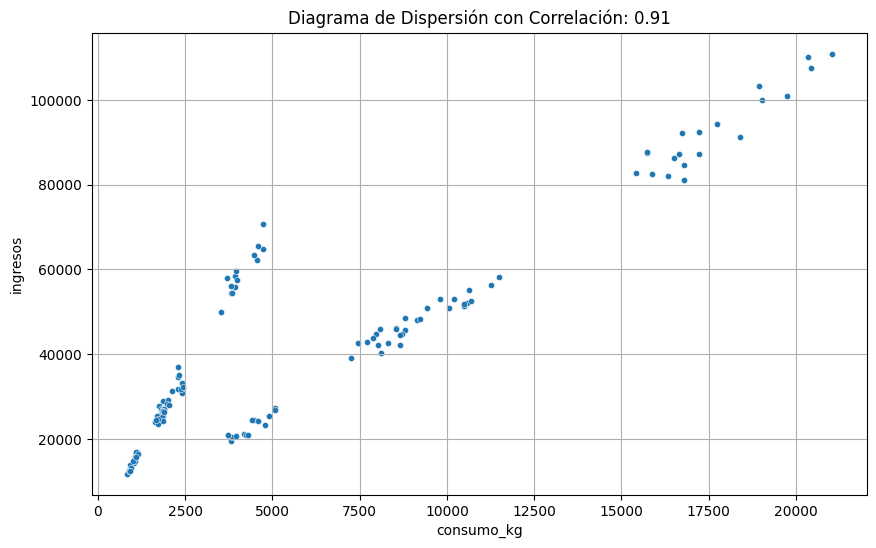

Respuesta LD:


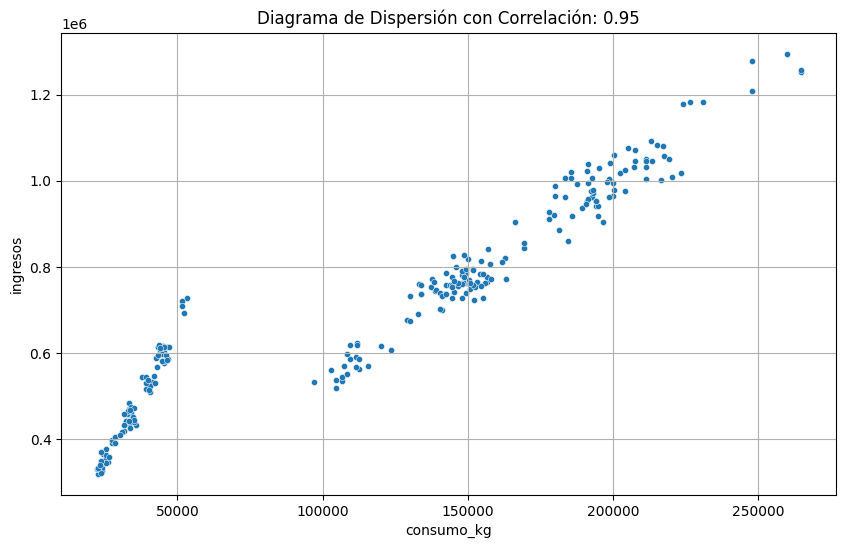

Respuesta MD:


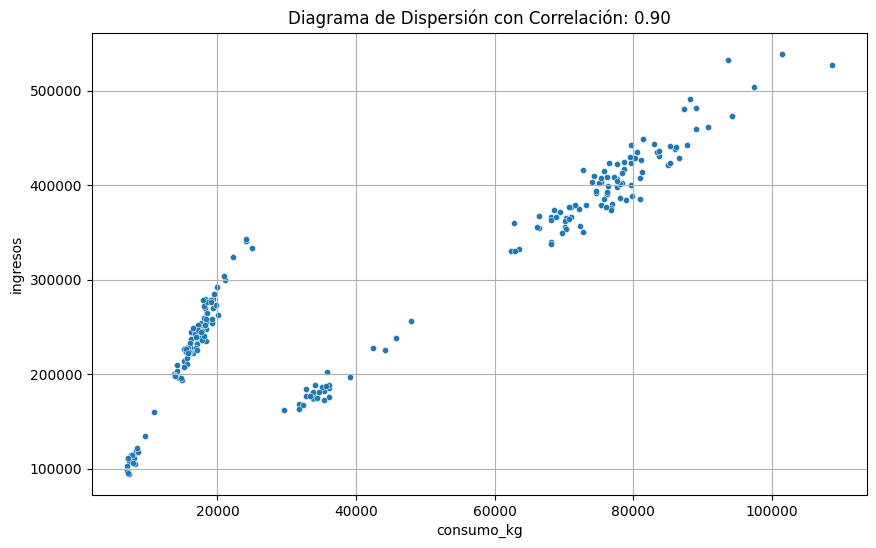

In [77]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    b.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

In [78]:
# Escribo aqui arriba la interpretacion de los datos de los calculos y graficas de abajo, no las de arriba.

# Aqui se refunda el guión que llevamos (partiendo de la base de que los datos son sintéticos):

# Hay un mal uso del tipo de avion segun recorridos.
# Vamos a ver a "ojo" la pendiente de la recta de cada grafica.

# Boeing 737 --> Avion de tamaño medio con autonomia de 2600 km (google) --> Los datos sinteticos se han ido bastante, pues este avion llega a hacer vuelos de 20000 km...demasiadas escalas o hay otros aviones diferentes.
# Quitando ese punto, su recta es la siguiente --> Punto 1: - (25.000,10.000) ; Punto 2:  (33.000, 12.500)

# Airbus 320 --> Avion de tamaño medio con autonomia de 6100 km (google) --> Los datos le hacen "volar" hasta los 10000 km. Quiza los datos sean con escalas, pero asumimos que se usa el mismo avion en cada escala.
# Pendiente recta --> Punto 1: - (5.000,2.000) ; Punto 2:  (20.000, 7.000)

# Boeing 747 --> Avion de gran tamaño con autonomia de 13450 km (google) --> Los datos le hacen "volar" hasta los 20000 km. Quiza los datos sean con escalas, pero asumimos que se usa el mismo avion en cada escala.
# Pendiente recta --> Punto 1: - (25.000,2.500) ; Punto 2:  (150.000, 12.500)

# Airbus A380 --> Es el avion mas grande del mundo de transporte de pasajeros con una autonomia de 15200 km. Tambien fuera de rango operativo.
# Pendiente recta --> Punto 1: - (33.000,2.500) ; Punto 2:  (150.000, 12.500)

In [79]:
# Es el mas eficiente segun su pendiente.
# Deberia de usarse este avion para todos los vuelos de corta distancia (menor a 2500 km).

pendiente_737 = (12.5-10)/(33-25)
pendiente_737

0.3125

In [80]:
# Es el segun avion mas eficiente como era de preveer, pues los aviones mas pequeños pesan menos y a igualdad de distancia consumiran menos.
# Aun asi, segun los datos, se deberia de usar solo cuando las distancias fueran superiores a 2500 km.

pendiente_A320 = (5-2)/(20-7)
pendiente_A320

0.23076923076923078

In [81]:
# No es porque sea yo europeo, pero teniendo el A380, no usaria el 747 para vuelos de larga distancia pues es claramente menos eficiente.

pendiente_747 = (25-2.5)/(150-12.5)
pendiente_747

0.16363636363636364

In [82]:
# El rey de la larga distancia sigue siendo el "Rey". Es tan eficiente como el A320 y casi le triplica en autonomia (con su considerable peso)

pendiente_A380 = (33-2.5)/(150-12.5)
pendiente_A380

0.22181818181818183

In [83]:
# Graficas de donde sacamos la pendiente a "ojo"

col_directora = "avion"
col_1 = "distancia"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]

Respuesta Boeing 737:


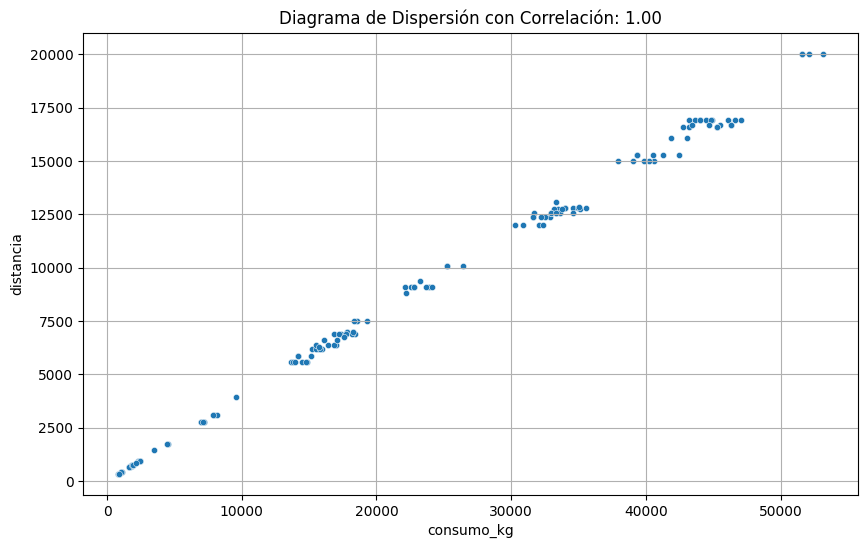

Respuesta Airbus A380:


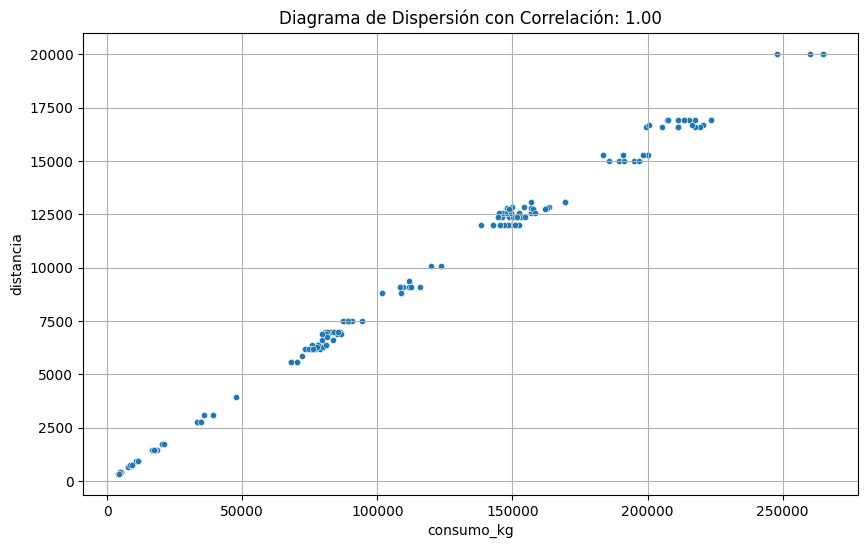

Respuesta Boeing 747:


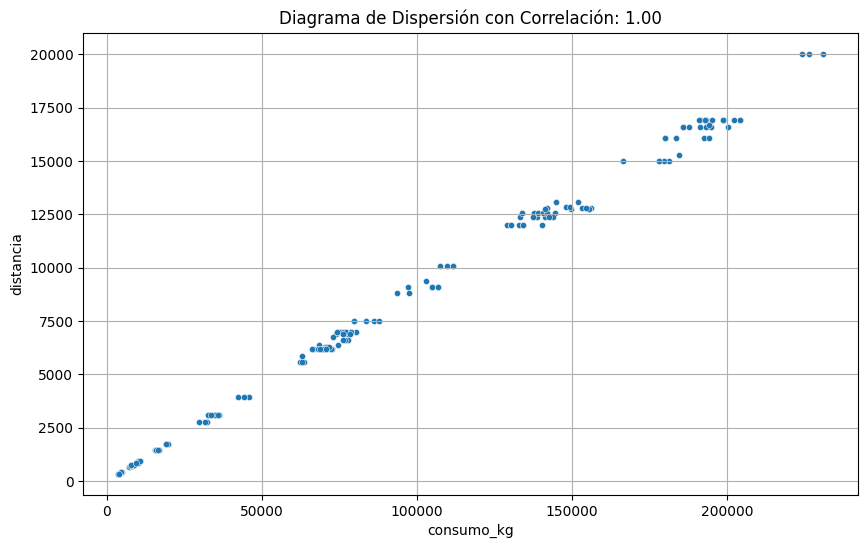

Respuesta Airbus A320:


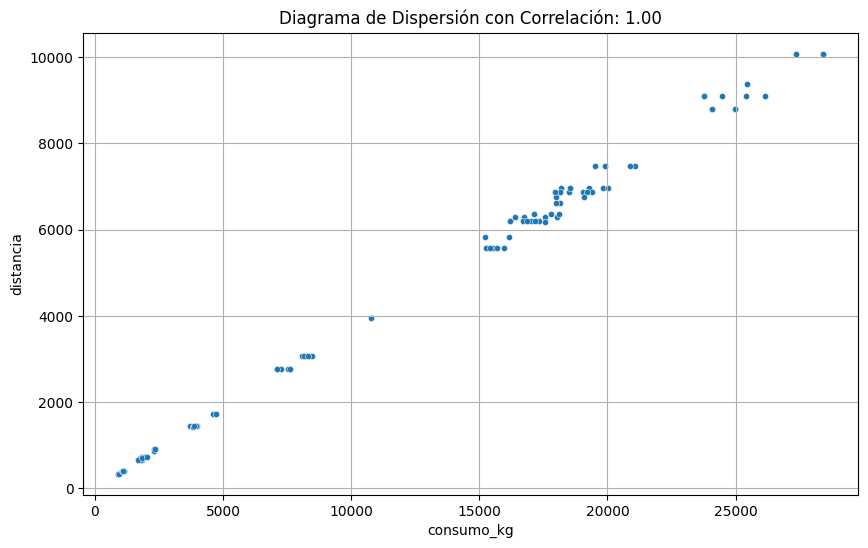

In [84]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    b.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## Conclusion

Usar los aviones segun sus especificaciones de uso, es decir, no usar aviones de largo recorrido para vuelos de corta distancia y lo mismo con los de media distancia, no es rentable.

Si montaos una compañia aerea que lo haga bien nos forramos.

A la respuesta de mi superior sobre que compañias lo hacen mejor y por lo tanto deberiamos observarlas, esta es la conclusion:

La compañia mas rentable en vuelos CD es --> Pampangea con un coste de 12.81 kg/$  
 
La compañia mas rentable en vuelos MD es --> Pampangea con un coste de 13.34 kg/$
 
La compañia mas rentable en vuelos LD es --> Tabarir con un coste de 14.68 kg/$    

In [85]:
df_conclusion = (df_air_jun.groupby(["aircompany", "cat_vuelo"])["consumo_kg"].mean())/(df_air_jun.groupby(["aircompany", "cat_vuelo"])["ingresos"].mean())*100
df_conclusion

aircompany  cat_vuelo
Airnar      CD           16.025233
            LD           16.713986
            MD           16.348672
FlyQ        CD           13.749644
            LD           17.753389
            MD           14.898905
MoldaviAir  CD           13.946593
            LD           17.229195
            MD           14.520853
PamPangea   CD           12.818496
            LD           16.447341
            MD           13.346658
TabarAir    CD           15.720739
            LD           14.683595
            MD           15.013045
dtype: float64

In [86]:
lista_air = []

for nombre in list(df_conclusion.index):
        lista_air.append(nombre[0])

set_air = set(lista_air)
set_air

{'Airnar', 'FlyQ', 'MoldaviAir', 'PamPangea', 'TabarAir'}

In [87]:
lista_set = list(set_air)
diccionario_air = {}

for compania in set_air:
    diccionario_air[compania] = df_conclusion.loc[compania].sum()/3

diccionario_air

df_eficiencia = pd.DataFrame(diccionario_air, index = [1])
df_eficiencia



,TabarAir,FlyQ,Airnar,PamPangea,MoldaviAir
1,15.139126,15.467313,16.36263,14.204165,15.232213


In [88]:
# Ainar es la menos eficiente

df_eficiencia.iloc[0].max()

16.362629966494776

In [89]:
# Pampangea es la mas eficiente

df_eficiencia.iloc[0].min()

14.204164776133409

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

### Pequeña coclusion

Por lo datos mostrados en las graficas aplicando las variables de eficiencia no veo justificacion para que TabarAir sea la que menos ingresos genere teniendo el mayor numero de vuelos.   
Parece todo lo contrario, que debiera de ser la que mas ingresos generase.   
Falra mirar muchas cosas, pero se me ha acabado el tiempo...

In [116]:
df_air_jun.groupby(["aircompany"])["ingresos"].sum()

aircompany
Airnar        40529397.82
FlyQ          43374852.87
MoldaviAir    72894268.81
PamPangea     55974794.70
TabarAir      38487996.70
Name: ingresos, dtype: float64

In [90]:
df_air_jun["ingreso_kg"] = df_air_jun["ingresos"]/df_air_jun["consumo_kg"]

In [91]:
df_air_jun["kg_km"] = df_air_jun["consumo_kg"]/df_air_jun["distancia"]

In [92]:
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ingreso_kg,kg_km
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD,13.835678,2.502900
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LD,13.994604,2.628288
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,LD,5.343473,12.022400
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD,13.704256,2.673000
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD,5.092391,11.512800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LD,13.289303,2.653560
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD,5.067440,11.906800
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,LD,14.632605,2.478600
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LD,5.196054,11.086400


(2,)


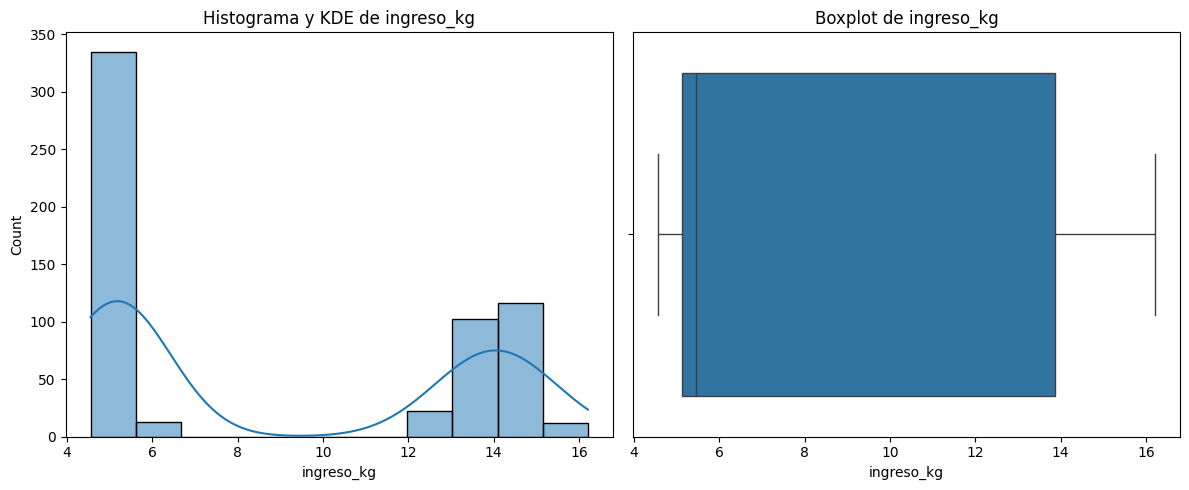

In [93]:
b.plot_combined_graphs(df_air_jun, ["ingreso_kg"], whisker_width= 4.5)

(2,)


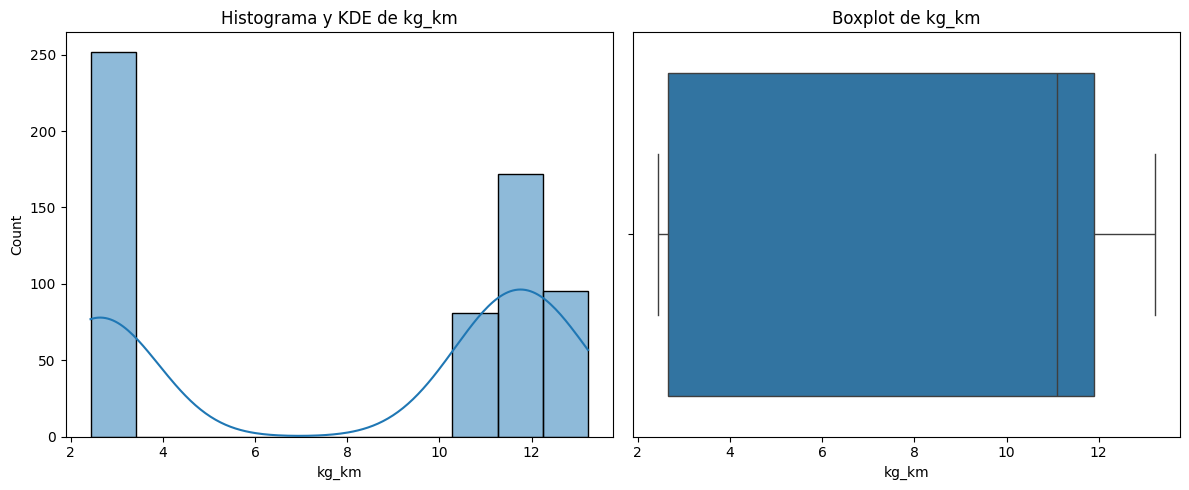

In [94]:
b.plot_combined_graphs(df_air_jun, ["kg_km"], whisker_width= 4.5)

In [108]:
df_air_jun["supereficiencia"] = False

In [109]:
filtro_super = df_air_jun["kg_km"] <= 3
df_air_jun.loc[filtro_super, "supereficiencia"] = True

In [110]:
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ingreso_kg,kg_km,supereficiencia,super_rentable
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD,13.835678,2.502900,True,False
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LD,13.994604,2.628288,True,False
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,LD,5.343473,12.022400,False,False
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD,13.704256,2.673000,True,False
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD,5.092391,11.512800,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LD,13.289303,2.653560,True,False
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD,5.067440,11.906800,False,False
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,LD,14.632605,2.478600,True,False
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LD,5.196054,11.086400,False,False


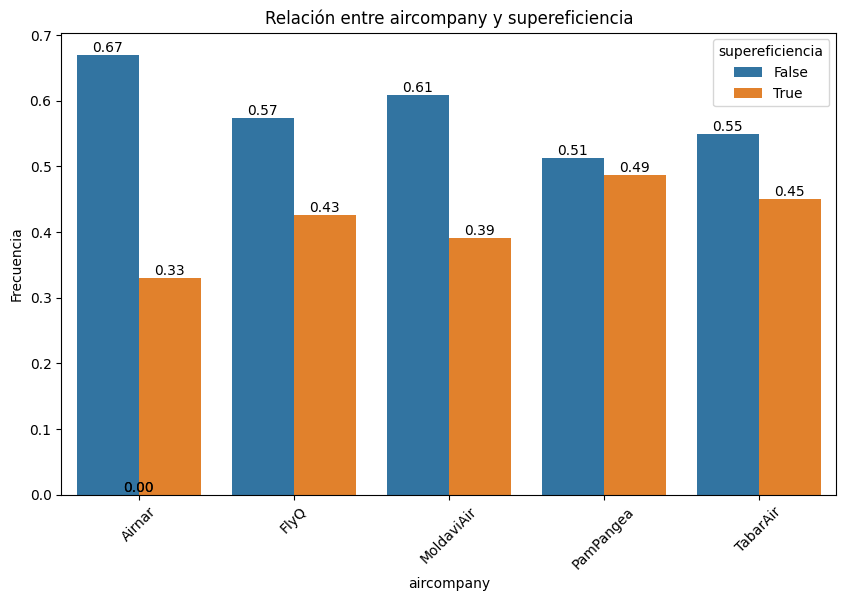

In [111]:
b.plot_categorical_relationship_fin(df_air_jun, "aircompany","supereficiencia", show_values= True, relative_freq=True)

In [112]:
df_air_jun["super_rentable"] = False

In [113]:
filtro_super_ren = df_air_jun["ingreso_kg"] >= 14
df_air_jun.loc[filtro_super_ren, "super_rentable"] = True

In [114]:
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ingreso_kg,kg_km,supereficiencia,super_rentable
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD,13.835678,2.502900,True,False
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LD,13.994604,2.628288,True,False
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,LD,5.343473,12.022400,False,False
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD,13.704256,2.673000,True,False
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD,5.092391,11.512800,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LD,13.289303,2.653560,True,False
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD,5.067440,11.906800,False,False
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,LD,14.632605,2.478600,True,True
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LD,5.196054,11.086400,False,False


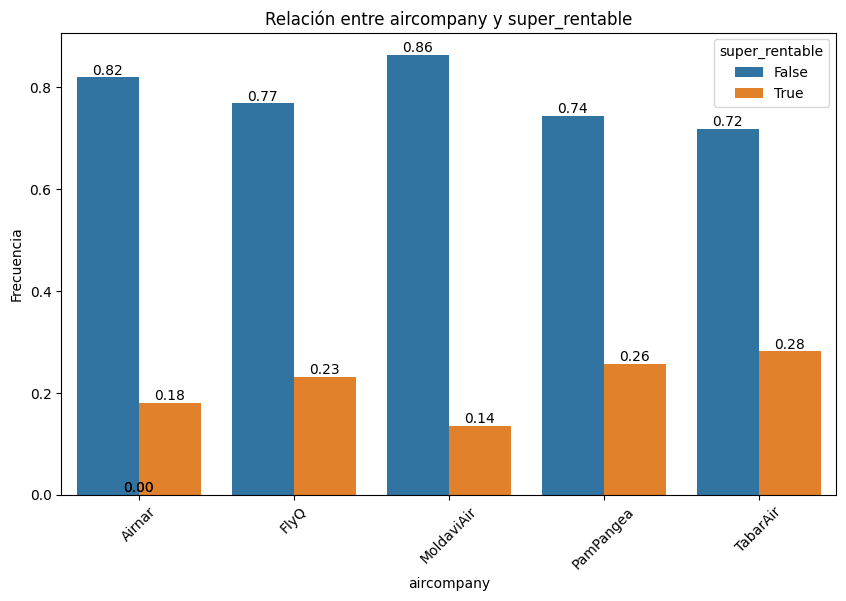

In [115]:
b.plot_categorical_relationship_fin(df_air_jun, "aircompany","super_rentable", show_values= True, relative_freq=True)

In [ ]:
# Lo acabare nada mas pueda